# The Sparks Foundation| Task 2: Prediction using Unsupervised ML

## Author : Saurabh Kumar

# TASK-2 

## Task: Predict the optimum number of clusters and represent it visually

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Reading and understanding the data

In [6]:
df=pd.read_csv("iris-sparkintern.csv")
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [7]:
df.shape

(150, 6)

- we have 150 rows and 6 columns 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [9]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

### DATA CLEANING 

In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- There is no null values . the dataset looks very clean we can proceed with the same dataset

# Data visualization

### Univariate Analysis

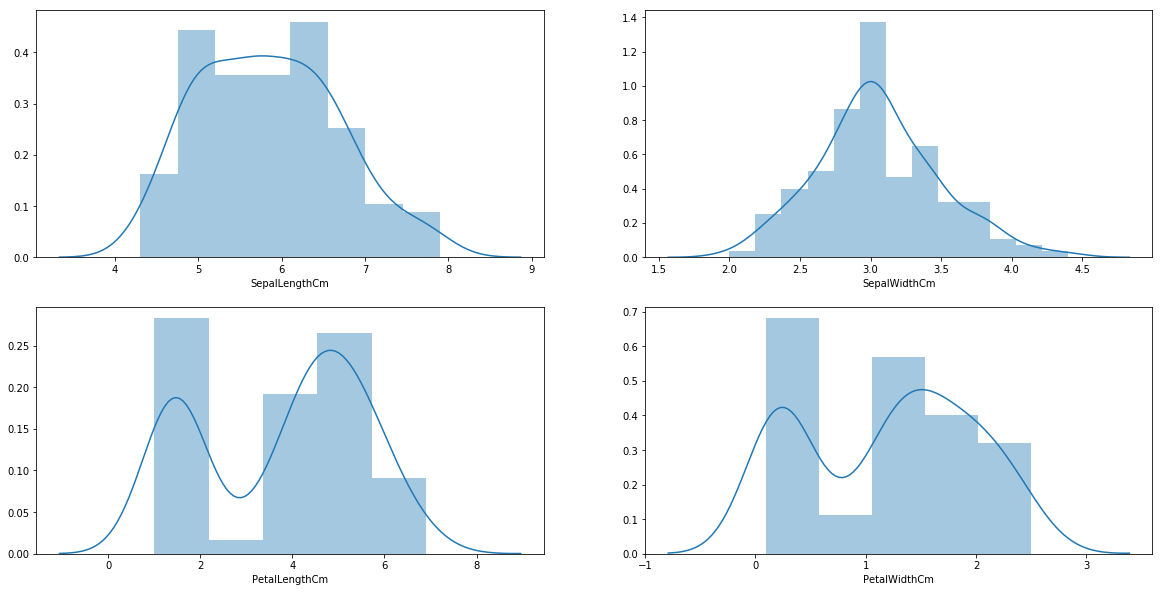

In [11]:
fig,ax=plt.subplots(2,2,figsize=(20,10))
plt1=sns.distplot(df["SepalLengthCm"],ax=ax[0,0])
plt2=sns.distplot(df["SepalWidthCm"],ax=ax[0,1])
plt3=sns.distplot(df["PetalLengthCm"],ax=ax[1,0])
plt4=sns.distplot(df["PetalWidthCm"],ax=ax[1,1])

-Petal length and Petal width has the variation in the data distribution hence it might be helping us in drawing some references 

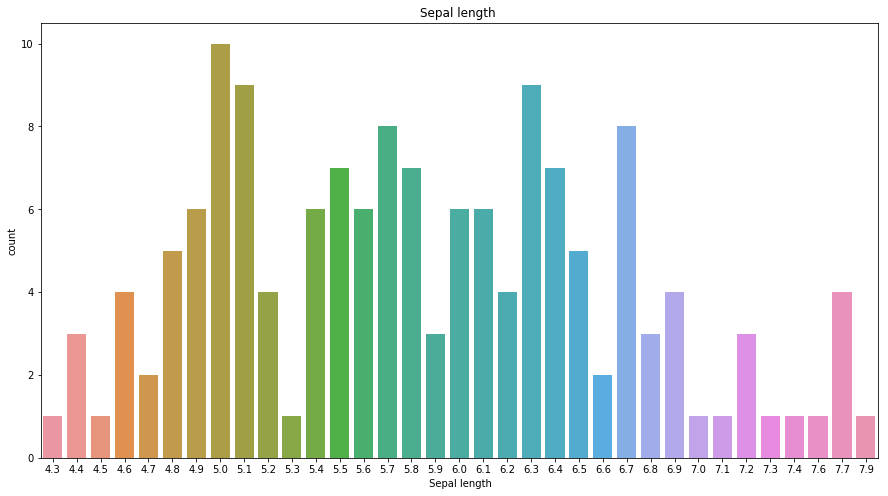

In [12]:
fig=plt.figure(figsize=(15,8))
sns.countplot(df["SepalLengthCm"])
plt.title("Sepal length ")
plt.xlabel(" Sepal length")
plt.show()

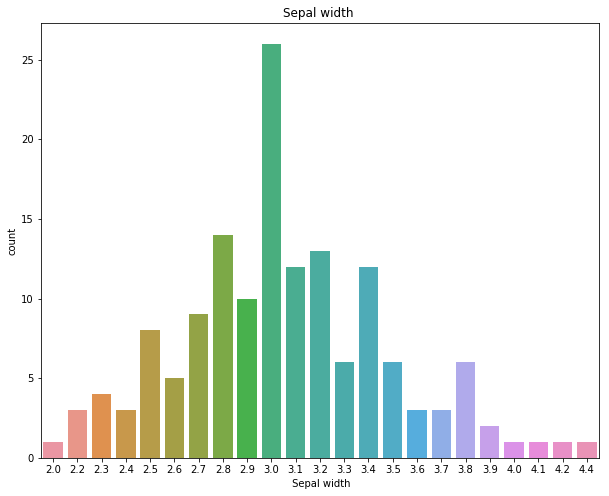

In [13]:
fig=plt.figure(figsize=(10,8))
sns.countplot(df["SepalWidthCm"])
plt.title("Sepal width ")
plt.xlabel(" Sepal width")
plt.show()

- We can notice that most of the flower Sepal width fall in the range  2.5 to 3.5

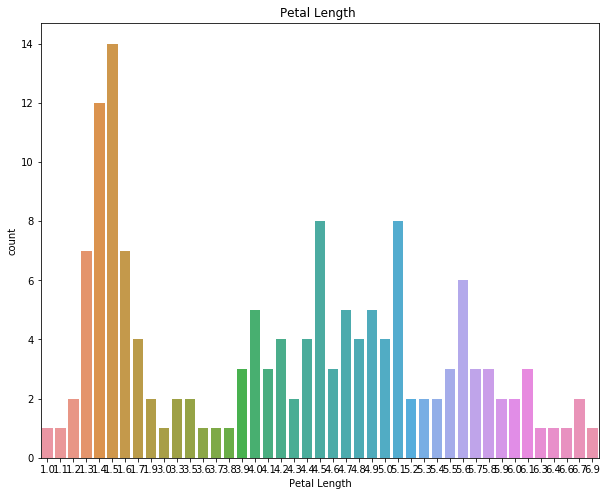

In [14]:
fig=plt.figure(figsize=(10,8))
sns.countplot(df["PetalLengthCm"])
plt.title("Petal Length ")
plt.xlabel("Petal Length")
plt.show()

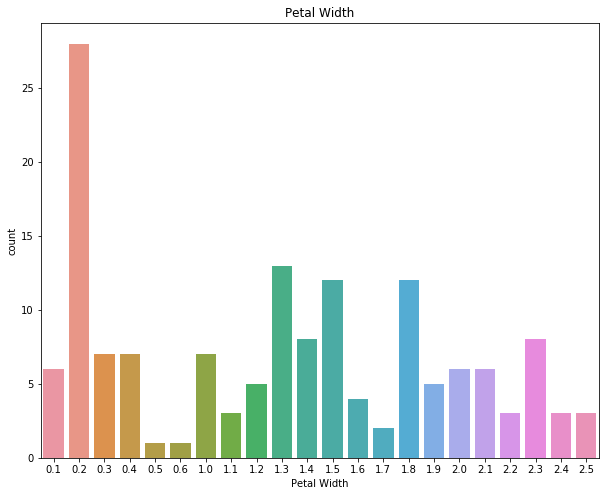

In [15]:
fig=plt.figure(figsize=(10,8))
sns.countplot(df["PetalWidthCm"])
plt.title("Petal Width")
plt.xlabel("Petal Width")
plt.show()

- Many flower have the petal width as 0.2 

### Bivariate analysis

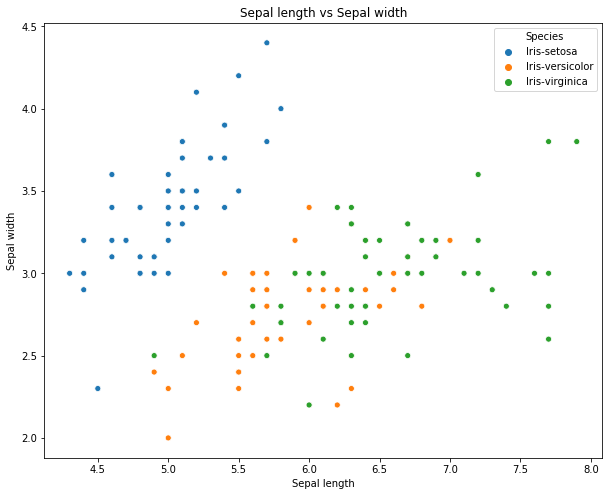

In [16]:
fig = plt.figure(figsize = (10,8))
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=df,hue="Species")
plt.xlabel('Sepal length')
plt.ylabel("Sepal width")
plt.title("Sepal length vs Sepal width")
plt.show()

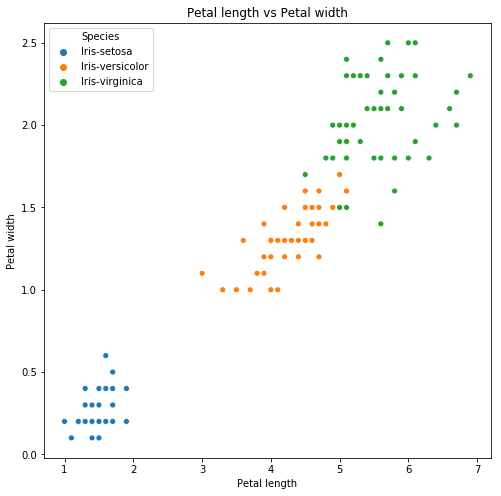

In [17]:
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",data=df,hue="Species")
plt.xlabel('Petal length')
plt.ylabel("Petal width")
plt.title("Petal length vs Petal width")
plt.show()

- We can notice we have the datset with good variance .It is definitlely going to give us good clusters 

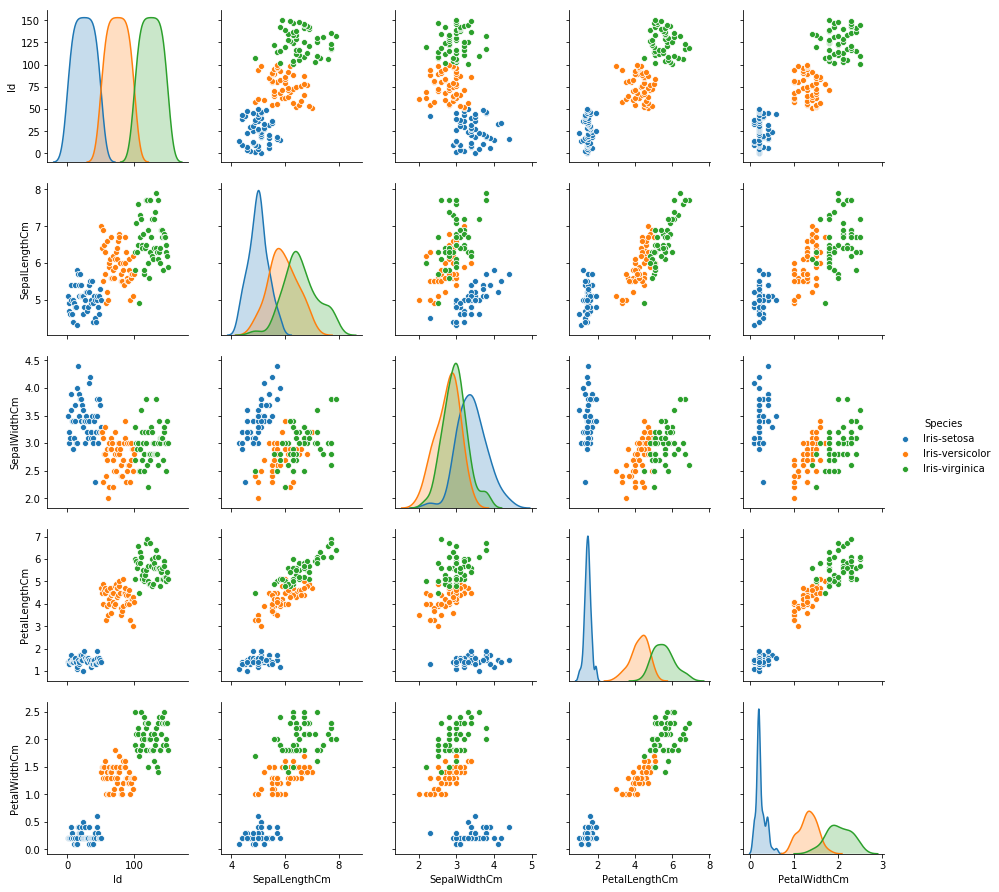

In [18]:
sns.pairplot(df,hue="Species")
plt.show()

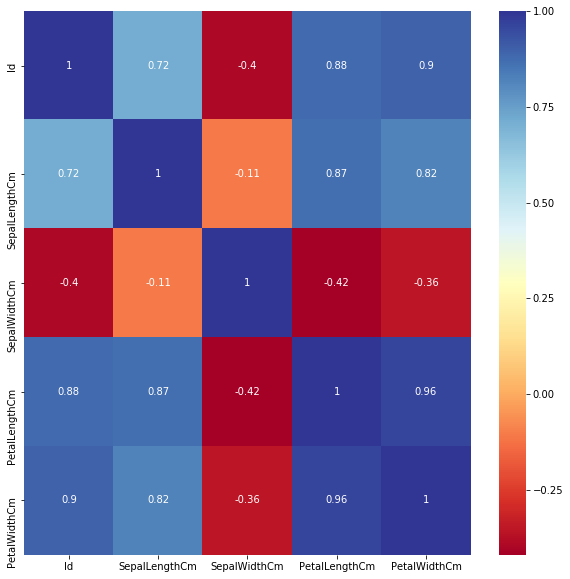

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlBu")
plt.show()

- The variables are highly correlated 

### Outliers Treatment 

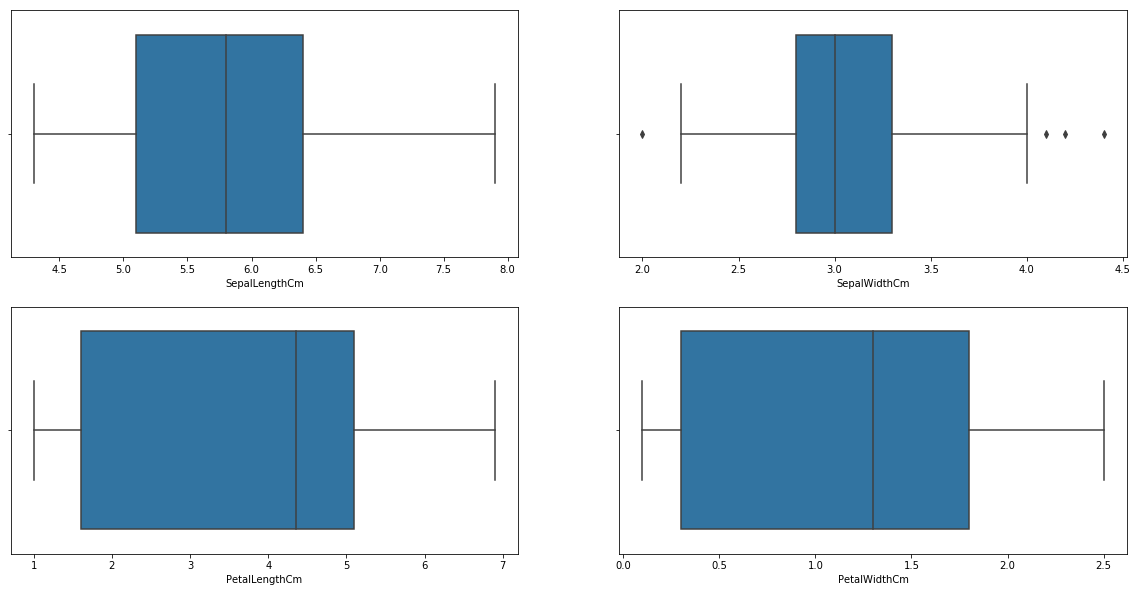

In [20]:
fig, axs = plt.subplots(2,2, figsize = (20,10))
plt1 = sns.boxplot(df['SepalLengthCm'], ax = axs[0,0])
plt2 = sns.boxplot(df['SepalWidthCm'], ax = axs[0,1])
plt3 = sns.boxplot(df['PetalLengthCm'], ax = axs[1,0])
plt1 = sns.boxplot(df['PetalWidthCm'], ax = axs[1,1])

- We see some outliers in the sepal Width we can cap them instead of dropping the outliers
- We can perform the soft range that is 1-99
- **But we have very less data we shall not touch the outliers and proceed ** 


## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [21]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
hopkins(df.drop("Species",axis=1))

0.7404603558435825

### Rescaling

In [23]:
rfm_df=df[["SepalWidthCm","SepalLengthCm","PetalWidthCm","PetalLengthCm"]]
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm_df)
rfm_scaled.shape

(150, 4)

In [24]:
rfm_scaled

array([[ 1.03205722e+00, -9.00681170e-01, -1.31297673e+00,
        -1.34127240e+00],
       [-1.24957601e-01, -1.14301691e+00, -1.31297673e+00,
        -1.34127240e+00],
       [ 3.37848329e-01, -1.38535265e+00, -1.31297673e+00,
        -1.39813811e+00],
       [ 1.06445364e-01, -1.50652052e+00, -1.31297673e+00,
        -1.28440670e+00],
       [ 1.26346019e+00, -1.02184904e+00, -1.31297673e+00,
        -1.34127240e+00],
       [ 1.95766909e+00, -5.37177559e-01, -1.05003079e+00,
        -1.17067529e+00],
       [ 8.00654259e-01, -1.50652052e+00, -1.18150376e+00,
        -1.34127240e+00],
       [ 8.00654259e-01, -1.02184904e+00, -1.31297673e+00,
        -1.28440670e+00],
       [-3.56360566e-01, -1.74885626e+00, -1.31297673e+00,
        -1.34127240e+00],
       [ 1.06445364e-01, -1.14301691e+00, -1.44444970e+00,
        -1.28440670e+00],
       [ 1.49486315e+00, -5.37177559e-01, -1.31297673e+00,
        -1.28440670e+00],
       [ 8.00654259e-01, -1.26418478e+00, -1.31297673e+00,
      

In [25]:
rfm_scaled=pd.DataFrame(rfm_scaled)
rfm_scaled

0         1         2         3
0    1.032057 -0.900681 -1.312977 -1.341272
1   -0.124958 -1.143017 -1.312977 -1.341272
2    0.337848 -1.385353 -1.312977 -1.398138
3    0.106445 -1.506521 -1.312977 -1.284407
4    1.263460 -1.021849 -1.312977 -1.341272
5    1.957669 -0.537178 -1.050031 -1.170675
6    0.800654 -1.506521 -1.181504 -1.341272
7    0.800654 -1.021849 -1.312977 -1.284407
8   -0.356361 -1.748856 -1.312977 -1.341272
9    0.106445 -1.143017 -1.444450 -1.284407
10   1.494863 -0.537178 -1.312977 -1.284407
11   0.800654 -1.264185 -1.312977 -1.227541
12  -0.124958 -1.264185 -1.444450 -1.341272
13  -0.124958 -1.870024 -1.444450 -1.511870
14   2.189072 -0.052506 -1.312977 -1.455004
15   3.114684 -0.173674 -1.050031 -1.284407
16   1.957669 -0.537178 -1.050031 -1.398138
17   1.032057 -0.900681 -1.181504 -1.341272
18   1.726266 -0.173674 -1.181504 -1.170675
19   1.726266 -0.900681 -1.181504 -1.284407
20   0.800654 -0.537178 -1.312977 -1.170675
21   1.494863 -0.900681 -1.050031 -1.284407
22   1.263460 -1.506521 -1.312977 -1.568735
23   0.569251 -0.900681 -0.918558 -1.170675
24   0.800654 -1.264185 -1.312977 -1.056944
25  -0.124958 -1.021849 -1.312977 -1.227541
26   0.800654 -1.021849 -1.050031 -1.227541
27   1.032057 -0.779513 -1.312977 -1.284407
28   0.800654 -0.779513 -1.312977 -1.341272
29   0.337848 -1.385353 -1.312977 -1.227541
..        ...       ...       ...       ...
120  0.337848  1.280340  1.447956  1.103953
121 -0.587764 -0.294842  1.053537  0.649027
122 -0.587764  2.249683  1.053537  1.672610
123 -0.819166  0.553333  0.790591  0.649027
124  0.569251  1.038005  1.185010  1.103953
125  0.337848  1.643844  0.790591  1.274550
126 -0.587764  0.432165  0.790591  0.592162
127 -0.124958  0.310998  0.790591  0.649027
128 -0.587764  0.674501  1.185010  1.047087
129 -0.124958  1.643844  0.527645  1.160819
130 -0.587764  1.886180  0.922064  1.331416
131  1.726266  2.492019  1.053537  1.502013
132 -0.587764  0.674501  1.316483  1.047087
133 -0.587764  0.553333  0.396172  0.762759
134 -1.050569  0.310998  0.264699  1.047087
135 -0.124958  2.249683  1.447956  1.331416
136  0.800654  0.553333  1.579429  1.047087
137  0.106445  0.674501  0.790591  0.990221
138 -0.124958  0.189830  0.790591  0.592162
139  0.106445  1.280340  1.185010  0.933356
140  0.106445  1.038005  1.579429  1.047087
141  0.106445  1.280340  1.447956  0.762759
142 -0.819166 -0.052506  0.922064  0.762759
143  0.337848  1.159173  1.447956  1.217684
144  0.569251  1.038005  1.710902  1.103953
145 -0.124958  1.038005  1.447956  0.819624
146 -1.281972  0.553333  0.922064  0.705893
147 -0.124958  0.795669  1.053537  0.819624
148  0.800654  0.432165  1.447956  0.933356
149 -0.124958  0.068662  0.790591  0.762759

[150 rows x 4 columns]

In [26]:
rfm_scaled.columns=["SepalWidthCm","SepalLengthCm","PetalWidthCm","PetalLengthCm"]
rfm_scaled.head()

SepalWidthCm  SepalLengthCm  PetalWidthCm  PetalLengthCm
0      1.032057      -0.900681     -1.312977      -1.341272
1     -0.124958      -1.143017     -1.312977      -1.341272
2      0.337848      -1.385353     -1.312977      -1.398138
3      0.106445      -1.506521     -1.312977      -1.284407
4      1.263460      -1.021849     -1.312977      -1.341272

# Finding the optimal number of clusters

In [27]:
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_scaled)
    
    ssd.append(kmeans.inertia_)
ssd 

[223.73200573676345,
 140.96581663074699,
 114.42714544645855,
 91.15330203158301,
 81.70180905987901,
 71.79160341094422,
 62.838753054054436]

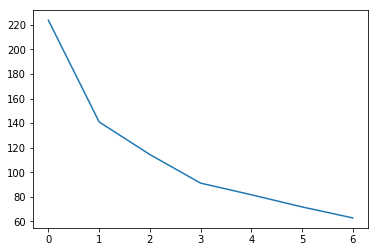

In [28]:
plt.plot(ssd)

### Silhouette Analysis

In [29]:
#silhoette analysis
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    #initialising k means
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_scaled)
    
    
    cluster_labels=kmeans.labels_
    
    #silhouette score
    silhouette_avg=silhouette_score(rfm_scaled,cluster_labels)
    print("For n_clusters={0},the silhouetee score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2,the silhouetee score is 0.580184463257396
For n_clusters=3,the silhouetee score is 0.4589717867018717
For n_clusters=4,the silhouetee score is 0.3957689217743031
For n_clusters=5,the silhouetee score is 0.3452050393551392
For n_clusters=6,the silhouetee score is 0.334725553368799
For n_clusters=7,the silhouetee score is 0.3420052304298811
For n_clusters=8,the silhouetee score is 0.3191460837848802


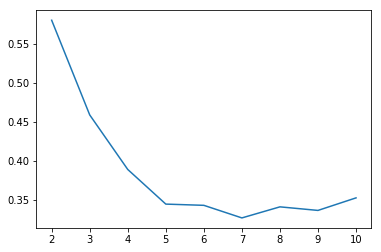

In [30]:
#plot the silhoutte score
ss=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=100).fit(rfm_scaled)
    ss.append([k,silhouette_score(rfm_scaled,kmeans.labels_)])
temp=pd.DataFrame(ss)
plt.plot(temp[0],temp[1])
plt.show()

- We will go ahead with the k=3 as shown int the elbow curve and also k=3 in the silhouette score confirms the good cluster 

In [31]:
kmeans=KMeans(n_clusters=3,max_iter=50,random_state=100)
kmeans.fit(rfm_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [32]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [33]:
df_new=df.copy()

In [34]:
df_new['label']=kmeans.labels_
df_new.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   label  
0      1  
1      1  
2      1  
3      1  
4      1

In [35]:
df_new.label.value_counts()

0    53
1    50
2    47
Name: label, dtype: int64

#### Visualizing the clusters formed 

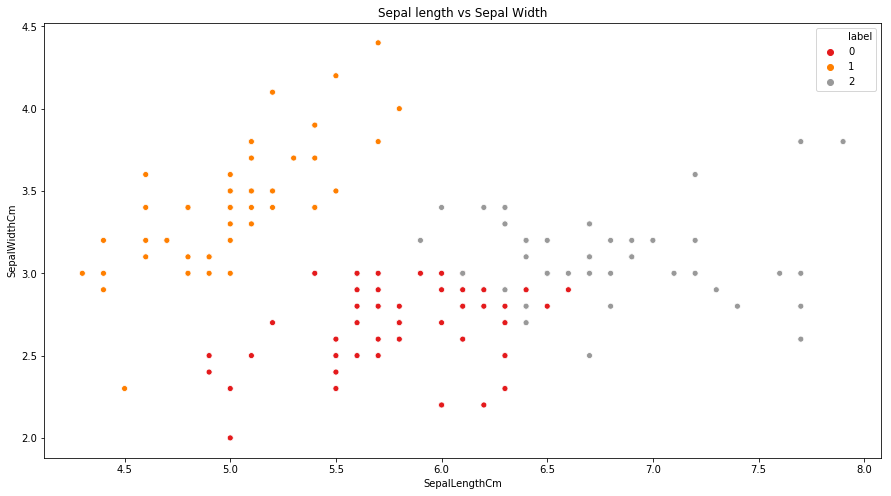

In [36]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='label',data=df_new,palette='Set1')
plt.title("Sepal length vs Sepal Width")
plt.show()

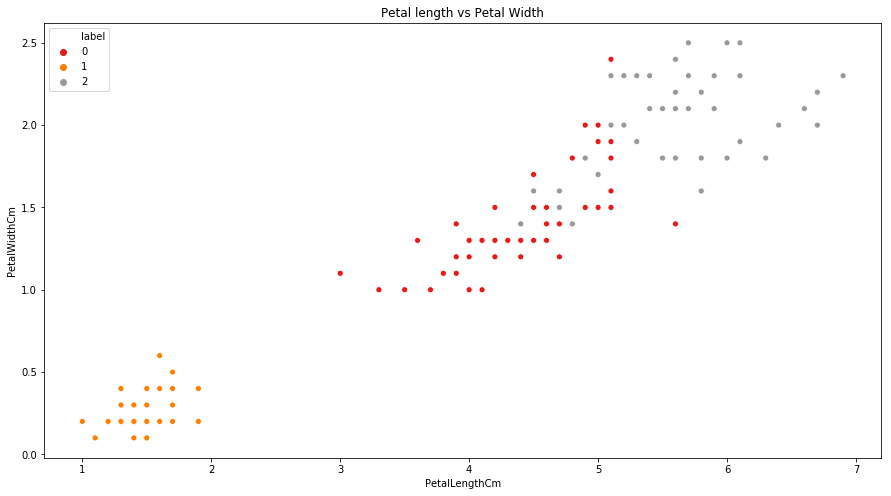

In [37]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='label',data=df_new,palette='Set1')
plt.title("Petal length vs Petal Width")
plt.show()

In [40]:
df_new[df_new["label"]==0]
df_new[df_new["label"]==1]
df_new[df_new["label"]==2]

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
50    51            7.0           3.2            4.7           1.4   
51    52            6.4           3.2            4.5           1.5   
52    53            6.9           3.1            4.9           1.5   
56    57            6.3           3.3            4.7           1.6   
65    66            6.7           3.1            4.4           1.4   
70    71            5.9           3.2            4.8           1.8   
75    76            6.6           3.0            4.4           1.4   
76    77            6.8           2.8            4.8           1.4   
77    78            6.7           3.0            5.0           1.7   
85    86            6.0           3.4            4.5           1.6   
86    87            6.7           3.1            4.7           1.5   
100  101            6.3           3.3            6.0           2.5   
102  103            7.1           3.0            5.9           2.1   
103  104            6.3           2.9            5.6           1.8   
104  105            6.5           3.0            5.8           2.2   
105  106            7.6           3.0            6.6           2.1   
107  108            7.3           2.9            6.3           1.8   
108  109            6.7           2.5            5.8           1.8   
109  110            7.2           3.6            6.1           2.5   
110  111            6.5           3.2            5.1           2.0   
111  112            6.4           2.7            5.3           1.9   
112  113            6.8           3.0            5.5           2.1   
115  116            6.4           3.2            5.3           2.3   
116  117            6.5           3.0            5.5           1.8   
117  118            7.7           3.8            6.7           2.2   
118  119            7.7           2.6            6.9           2.3   
120  121            6.9           3.2            5.7           2.3   
122  123            7.7           2.8            6.7           2.0   
124  125            6.7           3.3            5.7           2.1   
125  126            7.2           3.2            6.0           1.8   
127  128            6.1           3.0            4.9           1.8   
128  129            6.4           2.8            5.6           2.1   
129  130            7.2           3.0            5.8           1.6   
130  131            7.4           2.8            6.1           1.9   
131  132            7.9           3.8            6.4           2.0   
132  133            6.4           2.8            5.6           2.2   
135  136            7.7           3.0            6.1           2.3   
136  137            6.3           3.4            5.6           2.4   
137  138            6.4           3.1            5.5           1.8   
139  140            6.9           3.1            5.4           2.1   
140  141            6.7           3.1            5.6           2.4   
141  142            6.9           3.1            5.1           2.3   
143  144            6.8           3.2            5.9           2.3   
144  145            6.7           3.3            5.7           2.5   
145  146            6.7           3.0            5.2           2.3   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   

             Species  label  
50   Iris-versicolor      2  
51   Iris-versicolor      2  
52   Iris-versicolor      2  
56   Iris-versicolor      2  
65   Iris-versicolor      2  
70   Iris-versicolor      2  
75   Iris-versicolor      2  
76   Iris-versicolor      2  
77   Iris-versicolor      2  
85   Iris-versicolor      2  
86   Iris-versicolor      2  
100   Iris-virginica      2  
102   Iris-virginica      2  
103   Iris-virginica      2  
104   Iris-virginica      2  
105   Iris-virginica      2  
107   Iris-virginica      2  
108   Iris-virginica      2  
109   Iris-virginica      2  
110   Iris-virginica      2  
111   Iris-virg

### With the help of  K-mean clustering found the best 3 clusters from the dataset .
